# 1. Experimental Design

**Understanding the Problem**

Goal: To develop a classification model to differentiate between three classes of air quality based on 10 readings from sensors (1 senesor with 10 resistance readings). 


**Experiment Procedure**

1. Data Collection: The sensors record a sequences of gas resistance values collected in a controlled environment i.e. a smoke chamber, where different materials, including forest wood, are burned. These simulate various air quality conditions and the response from the sensors is then measured. The data therefore consists of 10 resistance readings(gas_resistance_0, ..., gas_resistance_9) per sequence and a label (specimen_class) that indicates the type of air quality (e.g., clean air, smoke from wood etc.).

Data Preprocessing: The dataset then needs to be split into training and testing subsets e.g. in a 80-20 split, in order to evaluate the model's performance of the classifier - the latter is done on the test data.


**Proposed Experiment Procedure**
 
Step 1: Data Collection: (a) Ensure the dataset covers different types and concentrations of smoke. (c) Ensure the data is balanced across the three classes to avoid bias.

Step 2: Data Preprocessing: (a) (Before looking at the data, so may not be necessary) Normalization or standardization of sensor readings *might* be necessary to ensure consistent scales across different features. (b) Encode the target variables.

Step 3: Choose a model and architecture, starting with the simplest and considering requirements e.g. size of dataset, non-linear/complex relationships etc, speed (time to solve the problem).

Step 4: Evaluation: Use appropriate metrics to evaluate the model’s performance, such as accuracy, precision, recall, F1-score, and confusion matrix.


# Data Analysis/Exploration

** 1. Read and look at columns & remove any redundant columns ** 


In [39]:
import pandas as pd

# Load the dataset
data = pd.read_csv('Data.csv')  # Replace with your actual path


# Check if the DataFrame is empty
print(data.empty)  # Should return False if there is data

# Check the shape of the DataFrame
print(data.shape)

# Check the data types of each column
print(data.dtypes)


False
(32180, 23)
specimen_data_point_ids    object
specimen_data_name         object
specimen_class             object
board_id                   object
sensor_id                  object
start_time                 object
end_time                   object
start_initial_real_time    object
end_initial_real_time      object
avg_temperature            object
avg_humidity               object
avg_pressure               object
heat_steps                 object
resistance_0               object
resistance_1               object
resistance_2               object
resistance_3               object
resistance_4               object
resistance_5               object
resistance_6               object
resistance_7               object
resistance_8               object
resistance_9               object
dtype: object


Let's drop unnecessary columns..

In [55]:
columns_to_drop = [
    'specimen_data_point_ids', 'specimen_data_name', 
    'board_id', 'sensor_id', 'start_time', 
    'end_time', 'start_initial_real_time', 'end_initial_real_time'
]

# Drop the columns
data = data.drop(columns=columns_to_drop)

# Check the resulting DataFrame to ensure columns are dropped
print(data.head())


  specimen_class  avg_temperature  avg_humidity  avg_pressure  \
0        pureAir        27.993671     18.536901   1023.107178   
1        pureAir        30.317087     14.661962   1023.248169   
2        pureAir        30.879215     13.655552   1023.224792   
3        pureAir        31.164026     12.920885   1023.197815   
4        pureAir        31.556269     12.596806   1023.196777   

            heat_steps  resistance_0  resistance_1  resistance_2  \
0  0,1,2,3,4,5,6,7,8,9   2642.002930  9.090176e+04  9.985207e+04   
1  0,1,2,3,4,5,6,7,8,9   9566.282227  8.875739e+05  8.458646e+05   
2  0,1,2,3,4,5,6,7,8,9  12901.375980  1.456311e+06  1.360887e+06   
3  0,1,2,3,4,5,6,7,8,9  14587.655270  1.818182e+06  1.783355e+06   
4  0,1,2,3,4,5,6,7,8,9  15895.817380  2.122642e+06  2.010424e+06   

   resistance_3  resistance_4  resistance_5  resistance_6  resistance_7  \
0  1.161390e+05   11790.80469   11562.97949   11705.74414   3733.905029   
1  9.152542e+05   61088.17969   57783.18359   5446

In [58]:
# List of columns that should be numeric [NOT STRING TYPE]
columns_to_convert = [
    'avg_temperature', 'avg_humidity', 'avg_pressure', 
    'resistance_0', 'resistance_1', 'resistance_2', 'resistance_3', 
    'resistance_4', 'resistance_5', 'resistance_6', 'resistance_7', 
    'resistance_8', 'resistance_9'
]

# Convert the specified columns to numeric, forcing errors to NaN
data[columns_to_convert] = data[columns_to_convert].apply(pd.to_numeric, errors='coerce')

# Check the data types to confirm conversion
print(data.dtypes)

# Fill NaN values in numeric columns with the mean of each column
data.fillna(data.mean(), inplace=True)

# Check there are no more NaN values
print(data.isnull().sum())



specimen_class      object
avg_temperature    float64
avg_humidity       float64
avg_pressure       float64
heat_steps          object
resistance_0       float64
resistance_1       float64
resistance_2       float64
resistance_3       float64
resistance_4       float64
resistance_5       float64
resistance_6       float64
resistance_7       float64
resistance_8       float64
resistance_9       float64
dtype: object
specimen_class     0
avg_temperature    0
avg_humidity       0
avg_pressure       0
heat_steps         0
resistance_0       0
resistance_1       0
resistance_2       0
resistance_3       0
resistance_4       0
resistance_5       0
resistance_6       0
resistance_7       0
resistance_8       0
resistance_9       0
dtype: int64


/Users/n_welikala/jobs/ml_challenge/myenv/lib/python3.7/site-packages/ipykernel_launcher.py:16: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  


Index(['specimen_class', 'avg_temperature', 'avg_humidity', 'avg_pressure',
       'heat_steps', 'resistance_0', 'resistance_1', 'resistance_2',
       'resistance_3', 'resistance_4', 'resistance_5', 'resistance_6',
       'resistance_7', 'resistance_8', 'resistance_9'],
      dtype='object')
0        1.161390e+05
1        9.152542e+05
2        1.367781e+06
3        1.859504e+06
4        2.131018e+06
             ...     
32175    8.979995e+06
32176    9.046935e+06
32177    9.130120e+06
32178    9.238229e+06
32179    9.253883e+06
Name: resistance_3, Length: 32180, dtype: float64


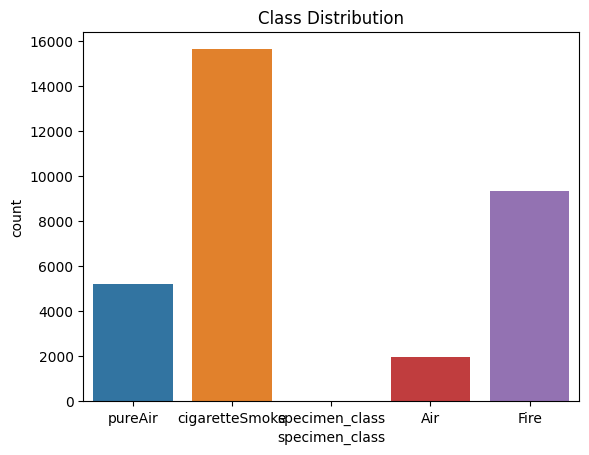

In [60]:
# Display the column names
print(data.columns)

# Check random column - resistance_3 in this case
print(data['resistance_3'])

# Check the class distribution
sns.countplot(x='specimen_class', data=data)
plt.title('Class Distribution')
plt.show()


There is a 'specimen_class' within the specimen_class which seems incorrect. 
Check the classes using unique(). 



In [61]:
print(data_cleaned['specimen_class'].unique())

['pureAir' 'cigaretteSmoke' 'specimen_class' 'Air' 'Fire']


Need to remove rows with the erroneous class that has been introduced in error before going to next steps. 

In [62]:
# Identify the rows with the wrong class
wrong_rows = data[data['specimen_class'] == 'specimen_class']
print(wrong_rows)

# Select only the rows with the correct class
data_cleaned = data[data['specimen_class'] != 'specimen_class']

# Check selection is correct
print(data_cleaned['specimen_class'].unique())

# Reset the index of the cleaned dataset
data_cleaned.reset_index(drop=True, inplace=True)



       specimen_class  avg_temperature  avg_humidity  avg_pressure  \
10424  specimen_class        35.136563     10.070253   1021.079385   

       heat_steps  resistance_0  resistance_1  resistance_2  resistance_3  \
10424  heat_steps  82878.125791  1.108851e+07  1.009469e+07  8.325747e+06   

        resistance_4   resistance_5   resistance_6  resistance_7  \
10424  425155.508369  380868.958719  347153.430618   60435.19549   

       resistance_8  resistance_9  
10424  71945.226049  78800.710693  
['pureAir' 'cigaretteSmoke' 'Air' 'Fire']


# Next steps

**2. Verify data is balanced across the three classes**

This is prevent the model from being biased towards on or more classes which are overrepr
esented in the sample.



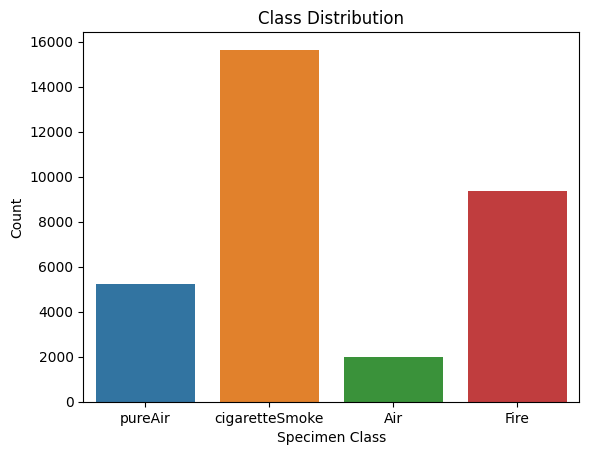

cigaretteSmoke    15636
Fire               9344
pureAir            5212
Air                1987
Name: specimen_class, dtype: int64


In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the distribution of classes
sns.countplot(x='specimen_class', data=data_cleaned)
plt.title('Class Distribution')
plt.xlabel('Specimen Class')
plt.ylabel('Count')
plt.show()

# Display the exact counts
print(data_cleaned['specimen_class'].value_counts())


Check the imbalance and correct it using resampling

In [64]:
# Calculate the percentage of each class
class_percentage = data_cleaned['specimen_class'].value_counts(normalize=True) * 100
print(class_percentage)


cigaretteSmoke    48.590696
Fire              29.037571
pureAir           16.196899
Air                6.174835
Name: specimen_class, dtype: float64


Balance the dataset by adjusting both the majority and minority classes - undersampling the former and oversampling the latter - so that they have the same number of sample

In [65]:
from sklearn.utils import resample

# Separate majority and minority classes
majority_class = data_cleaned[data_cleaned['specimen_class'] == 'cigaretteSmoke']  # Replace with actual class name
minority_class = data_cleaned[data_cleaned['specimen_class'] == 'Air']  # Replace with actual class name

# Undersample the majority class - factor of 0.5
majority_undersampled = resample(majority_class, 
                                 replace=False,           # Sample without replacement
                                 n_samples=int(len(majority_class) * 0.5),  # Reduce majority class by half
                                 random_state=42)

# Oversample the minority class - duplicate the sample to match the updated size of the majority class (above).

minority_oversampled = resample(minority_class, 
                                replace=True,             # Sample with replacement
                                n_samples=len(majority_undersampled),  # Match to undersampled majority class
                                random_state=42)

# Concatenate the undersampled majority class with the oversampled minority class
data_balanced = pd.concat([majority_undersampled, minority_oversampled])

# Shuffle the dataset
data_balanced = data_balanced.sample(frac=1, random_state=42).reset_index(drop=True)

print(data_balanced['specimen_class'].value_counts())


cigaretteSmoke    7818
Air               7818
Name: specimen_class, dtype: int64


**3. Correlation Matrix** 

We want to analyse the correlation betwen all pairs of features. Obective is to have less correlated readings to increase number of unique measurements that relate to the air quality



In [66]:
# Compute the correlation matrix for the features (numeric type)
corr_matrix = data_balanced[numeric_columns].corr()

# Display the correlation matrix
print(corr_matrix)


                 avg_temperature  avg_humidity  avg_pressure  resistance_0  \
avg_temperature         1.000000     -0.479908      0.160146      0.653972   
avg_humidity           -0.479908      1.000000     -0.055723     -0.206973   
avg_pressure            0.160146     -0.055723      1.000000      0.489030   
resistance_0            0.653972     -0.206973      0.489030      1.000000   
resistance_1            0.547477     -0.167302      0.476917      0.932196   
resistance_2            0.536003     -0.169868      0.520341      0.948818   
resistance_3            0.513468     -0.174495      0.570957      0.950387   
resistance_4            0.495465     -0.150666      0.572040      0.945203   
resistance_5            0.473116     -0.144292      0.579079      0.933604   
resistance_6            0.454113     -0.136661      0.581162      0.922174   
resistance_7            0.563068     -0.095388      0.498586      0.980654   
resistance_8            0.605598     -0.100530      0.474598    

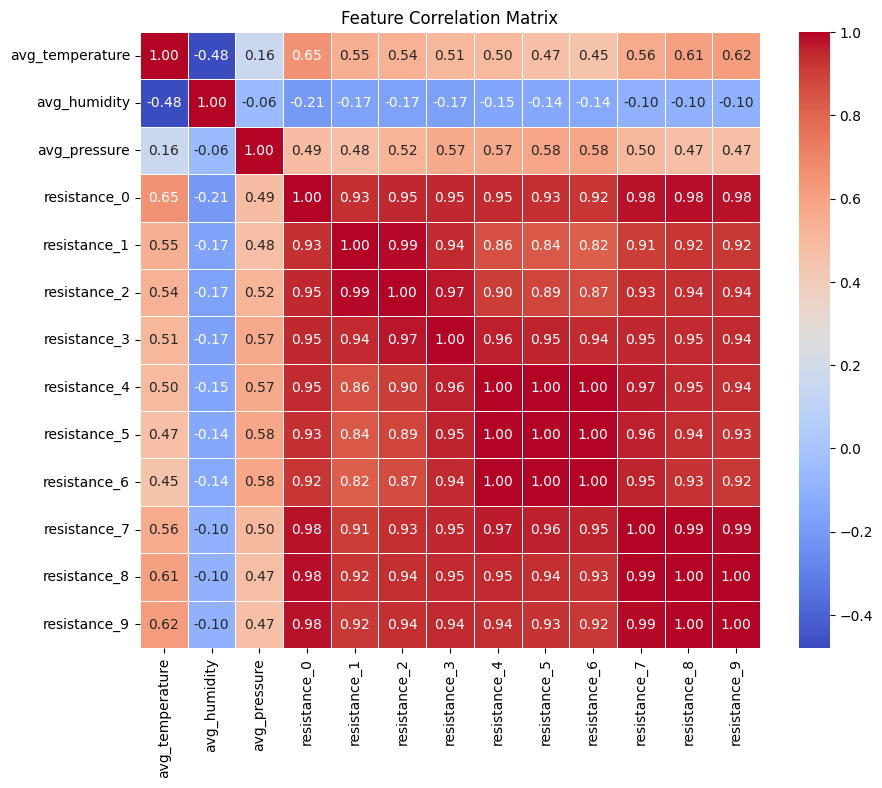

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the heatmap for the correlation matrix
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Feature Correlation Matrix')
plt.show()



Observations: the resistance values are highly correlated. Idealy, we need to drop some of the highly correlated pairs but they are so many her (e.g. correlation coefficient > 0.95), we will skip and proceed with next steps. We will do the PCA step instead.

In [82]:
from sklearn.preprocessing import StandardScaler

# Standardize the features
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data_balanced[numeric_columns])


In [83]:
from sklearn.decomposition import PCA

# Apply PCA
pca = PCA(n_components=None)  # Set n_components to None to retain all components initially
pca_result = pca.fit_transform(scaled_data)

# Check how much variance each principal component explains
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:")
print(explained_variance)

# Calculate cumulative explained variance
cumulative_variance = pca.explained_variance_ratio_.cumsum()
print("Cumulative explained variance:")
print(cumulative_variance)


Explained variance by each principal component:
[7.80773133e-01 9.84298811e-02 5.88090450e-02 3.10699813e-02
 2.37969903e-02 4.77810662e-03 1.30599615e-03 5.08970032e-04
 2.72233654e-04 1.05776490e-04 9.57871366e-05 2.91047533e-05
 2.49939562e-05]
Cumulative explained variance:
[0.78077313 0.87920301 0.93801206 0.96908204 0.99287903 0.99765714
 0.99896313 0.9994721  0.99974434 0.99985011 0.9999459  0.99997501
 1.        ]


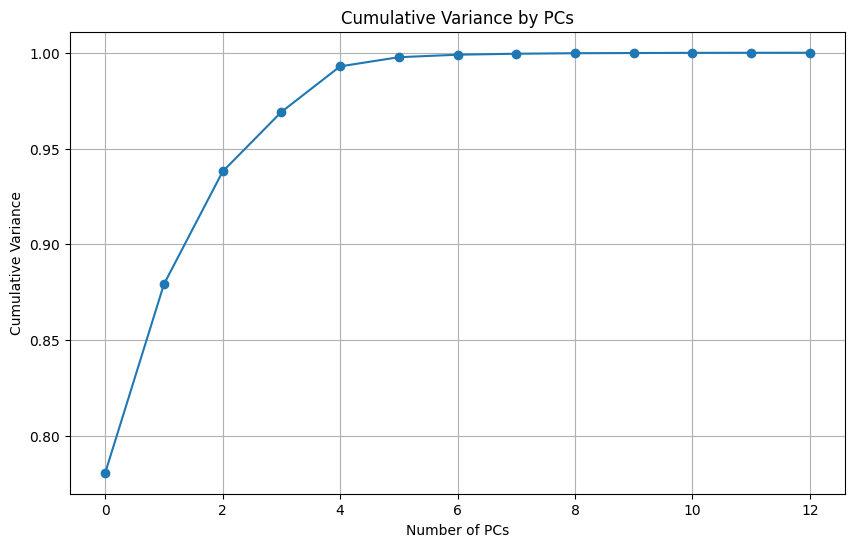

In [84]:
import matplotlib.pyplot as plt

# Plot cumulative variance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_variance, marker='o')
plt.title('Cumulative Variance by PCs')
plt.xlabel('Number of PCs')
plt.ylabel('Cumulative Variance')
plt.grid(True)
plt.show()


In [85]:
# Let's keep PCs that account for 95% of variance
pca = PCA(n_components=0.95)
pca_data = pca.fit_transform(scaled_data)

print(f"Original number of features: {scaled_data.shape[1]}")
print(f"Reduced number of features after PCA (compressed data set): {pca_data.shape[1]}")


Original number of features: 13
Reduced number of features after PCA (compressed data set): 4


In [86]:
# Add the PCA components back to the DataFrame for further use
pca_columns = [f'PC{i+1}' for i in range(pca_data.shape[1])]
data_pca = pd.DataFrame(data=pca_data, columns=pca_columns)

# Still keep the original target variable
data_pca['specimen_class'] = data_balanced['specimen_class'].values

print(data_pca.head())


        PC1       PC2       PC3       PC4  specimen_class
0 -0.945724 -0.281949  1.281093  0.252305  cigaretteSmoke
1 -1.353376 -0.933220  0.008380 -0.158044             Air
2 -1.554091 -1.165745 -0.227534  0.190922             Air
3 -1.112206 -0.635904 -0.149496  0.531189             Air
4 -2.098378  0.164990 -0.375865  0.592119             Air


# Step 3: Machine Learning

**In the interview on Thursday, I chose the Feedforward neural network which could work well here, especially if there are non-linear relationships among features which I expect to have. However, here, I decided to choose the Random Forest Classifier (RFC, which i also mentioned) due to:

(a) the relatively small dataset (around 30,000 rows) - it can build the trees quite fast so it scales well with the size of the dataset. 

(b) It's also quite robust to noise and overfitting because it uses an ensemble approach to classification, averaging over the predictions from many trees. Sensor data typically has a lot of noise (measurement error) and the RFC is less sensitive to individual measurement errors.

(c) The data above has a lot of collinearity due to the correlated features (see correlation matrix above). RFC selects features at random so less sensitive to this.

(d) More interpretibility of performance and results than e.g. Fast Forward NN

Approach: we use the Principle Components (PCs) as input features to the model.

In [87]:
# Separate the features (PCA components) and the target variable
X = data_pca.drop('specimen_class', axis=1)  # Features (PCA components)
y = data_pca['specimen_class']               # Target variable


In [88]:
from sklearn.model_selection import train_test_split

# Split the data into training: test 80:20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)


In [89]:
from sklearn.ensemble import RandomForestClassifier

# Initialize RFC
rf_model = RandomForestClassifier(n_estimators=50, random_state=42, class_weight='balanced')


In [91]:
# Train the model 
rf_model.fit(X_train, y_train)


RandomForestClassifier(class_weight='balanced', random_state=42)

In [93]:
# Make prediction based on test data
y_pred = rf_model.predict(X_test)




# Results

In [94]:
# Implement Performance metrics


from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))


Accuracy: 100.00%
Classification Report:
                precision    recall  f1-score   support

           Air       1.00      1.00      1.00      1564
cigaretteSmoke       1.00      1.00      1.00      1564

      accuracy                           1.00      3128
     macro avg       1.00      1.00      1.00      3128
  weighted avg       1.00      1.00      1.00      3128

Confusion Matrix:
[[1564    0]
 [   0 1564]]
